Dataset shape: (178, 13)
Target distribution:
target
1    71
0    59
2    48
Name: count, dtype: int64

Model Accuracy: 1.0000

Classification Report:
              precision    recall  f1-score   support

     class_0       1.00      1.00      1.00        12
     class_1       1.00      1.00      1.00        14
     class_2       1.00      1.00      1.00        10

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36


Selected Features after Variance Thresholding:
['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']


<ipython-input-5-7d31cb72577b>:70: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_importances, palette='viridis')


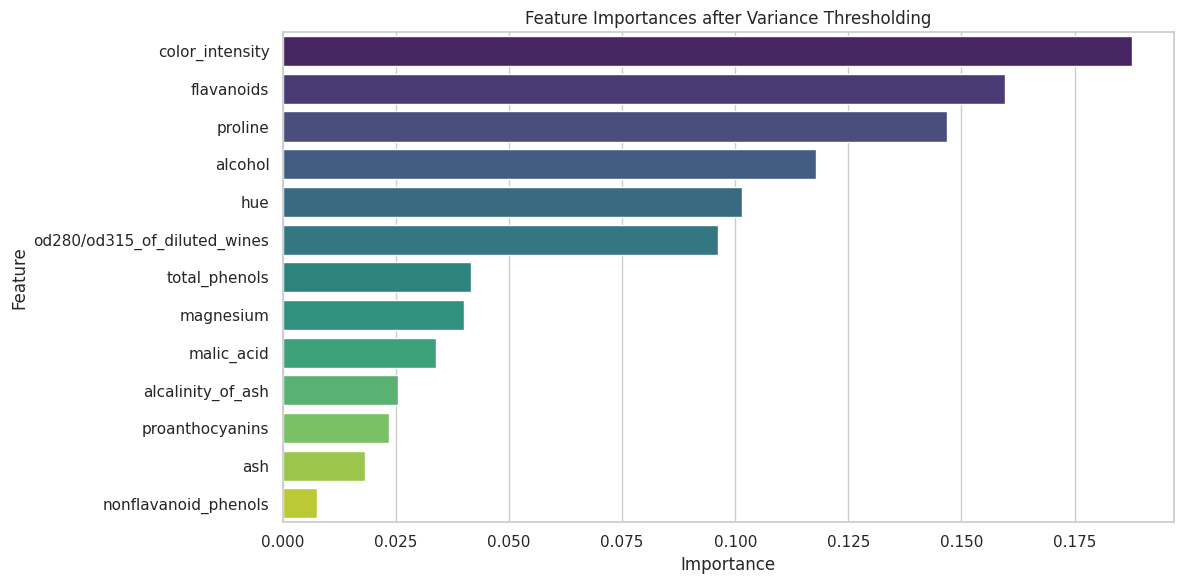

In [5]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import VarianceThreshold
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, accuracy_score

# Set plot style for better aesthetics
sns.set(style="whitegrid")

# Load the Wine dataset
data = load_wine()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target, name='target')

# Display the shape of the dataset
print(f"Dataset shape: {X.shape}")
print(f"Target distribution:\n{y.value_counts()}")

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Define the pipeline steps
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Feature Scaling
    ('variance_threshold', VarianceThreshold(threshold=0.1)),  # Feature Selection
    ('classifier', RandomForestClassifier(random_state=42))  # Classification Model
])

# Fit the pipeline on the training data
pipeline.fit(X_train, y_train)

# Predict on the test set
y_pred = pipeline.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
print(f"\nModel Accuracy: {accuracy:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=data.target_names))

# Retrieve the names of the selected features
# After fitting, access the 'variance_threshold' step to get the support mask
selected_mask = pipeline.named_steps['variance_threshold'].get_support()
selected_features = X.columns[selected_mask]
print(f"\nSelected Features after Variance Thresholding:")
print(selected_features.tolist())

# Visualize feature importances
# Access the trained classifier from the pipeline
importances = pipeline.named_steps['classifier'].feature_importances_

# Create a DataFrame for visualization
feature_importances = pd.DataFrame({
    'Feature': selected_features,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(12, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importances, palette='viridis')
plt.title('Feature Importances after Variance Thresholding')
plt.tight_layout()
plt.show()